# Лабораторная работа 7: задача Коши

### Задание 1: решить дифференциальное уравнение методом Тейлора 4 порядка

*Задана задача Коши: $
\begin{gather}
   y'(x)=f(x,y(x)), x\in(a,b)\\
  y(a)=y^0
\end{gather}
$, где $y(x) - $вектор: $y(x)=(y_1(x),\ldots,y_n(x))$, $y_0 - $заданный начальный вектор*

*При численном решении ищется последовательность векторов $ \lbrace y_n \rbrace $, являющихся приближениями для значений решения $ \lbrace y(x_n) \rbrace$ на множестве точек сетки $w_N= \lbrace x_i: x_{i+1}=x_i+h_i, (i=0,1,\ldots,N-1), x_0=a, x_N=b \rbrace$, где $h_i - $шаг сетки (будем считать его постоянным и равным $h$)*

*Метод Тейлора приближенного решения в точке $x_{n+1}$ основан на разложении решения в ряд Тейлора в точке $x_n$ по степеням шага $h$. Далее, в зависимости от порядка метода, ряд обрывают на некотором слагаемом*.

*Таким образом, для метода Тейлора 4 порядка, имеем: $y(x_{n+1}) = y(x_n) + h \cdot y'(x_n) + \frac{h^2}{2!} \cdot y''(x_n) + \frac{h^3}{3!} \cdot y'''(x_n) + \frac{h^4}{4!} \cdot y^{(4)}(x_n)$, где $y'(x)=f(x,y(x)), y''(x)=\frac{df}{dx}$ и т.д.*

Задано дифференциальное уравнение второго порядка: $6y''+8y'+8y=x \cdot e^{-2 \cdot x}$ на интервале $x\in[0,2]$ при следующих начальных условиях: $y(0)=1, y'(0)=0$

Сведем уравнение 2 порядка к системме дифференциальных уравнений 1 порядка путем замены: $y_1=y$ и $y_2=y'$.  
Получим: 
$\begin{gather}
   y_1'=y_2=f_1\\
   y_2'=-\frac{4y_2}{3} - \frac{4y_1}{3} + \frac{x}{6} \cdot e^{-2x}=f_2
\end{gather}
$

Введем векторы: $y=(y_1,y_2)$ и $f=(f_1,f_2)$.  
Тогда производные в векторной форме запишутся:  
$y'=f$  
$y''=f_x+f_y \cdot f$  
  
$f_x= \begin{array}{c}\ 
(f_1)_x & \\
(f_2)_x & 
\end{array} $ 
  
$f_y= \begin{array}{cc}\ 
(f_1)_{y_1} & (f_1)_{y_2} &\\
(f_2)_{y_1} & (f_2)_{y_2} &
\end{array} $ (якобиан, в нашем случае это константа $M$)  
  
$y''=f_x+M \cdot f$  
Аналогично: $y'''=f_{xx}+M \cdot f_x$ и $y^{(4)}=f_{xxx}+M \cdot f_{xx}$  

Решение ДУ заданным методом (похоже на "черный ящик" при условии, что якобиан равен константе, а система имеет вид, близкий к данному. Ниже будет решение в "черном ящике" для метода Тейлора 2 порядка для любой системы ДУ)

In [30]:
import numpy as np
from math import exp, sin, cos, sqrt
from scipy import *
from scipy.linalg import *

from sympy import *
init_printing()
import matplotlib.pyplot as plt
import pylab

Задаем вектор-функцию $f=(f_1,f_2)$

In [31]:
def f(x,y1,y2):
    f1=y2
    f2=-(4/3)*y1-(4/3)*y2+(x/6)*exp(-2*x)
    return f1,f2

x=Symbol('x')
y1=Symbol('y1')
y2=Symbol('y2')

In [38]:
#x00-начальная точка
#y0-значение функции y в нуле=y1(0)
#y00-значение производной в нуле=y2(0)
#h-шаг
def F(f,x00,y0,y00,h):
    n=0
    z1=np.zeros([2,1])
    #y'=f
    W=np.zeros([2,1])
    #матрица f_x, первая компонента которой будет равна 0, поэтому ниже считать ее не будем
    W1=np.zeros([2,1])
    #матрица f_xx, первая компонента которой будет равна 0, поэтому ниже считать ее не будем
    W2=np.zeros([2,1])
    #матрица f_xxx, первая компонента которой будет равна 0, поэтому ниже считать ее не будем
    while True:
        x0=x00
        y10=np.array([[y0],[y00]])
        #y0 и y00
        n=n+1
        X=[x0]
        Y1=[y0]
        #решение y1=y
        Y2=[y00]
        #решение y2=y'
        k=1
        S=[y0]
        #выборка узлов для сравнения
        
        m11=diff(f(x,y1,y2)[0],y1).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
        m12=diff(f(x,y1,y2)[0],y2).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
        m21=diff(f(x,y1,y2)[1],y1).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
        m22=diff(f(x,y1,y2)[1],y2).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
        M=np.array([[m11,m12],[m21,m22]])
        #якобиан
        
        while x0>=0 and x0<=(6-h):
        
            W[1][0]=diff(f(x,y1,y2)[1],x).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            W1[1][0]=diff(f(x,y1,y2)[1],x,x).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            W2[1][0]=diff(f(x,y1,y2)[1],x,x,x).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            
            for i in range(2):
                z1[i]=f(x,y1,y2)[i].evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
                #вектор y'
            z2=W+dot(M,z1)
            #y''
            z3=W1+dot(M,W)
            #y'''
            z4=W2+dot(M,W1)
            #y''''
            
            yn=y10+h*z1+0.5*z2*h**2+(1/6)*z3*h**3+(1/24)*z4*h**4
            #итерационный процесс
            
            y10=yn
            x0=x0+h
            X.append(x0)
            Y1.append(yn[0][0])
            Y2.append(yn[1][0])
            
            #выборка
            k=k+1
            if k%2!=0:
                S.append(yn[0][0])
              
        
        h=h*0.5
        S=np.array(S,dtype=np.double)
        
        #выход из цикла
        if n!=1:
            Y3=np.array(Y3,dtype=np.double)
            if norm(S-Y3)/norm(Y3)<0.01:
                break 
        
        Y3=Y1
        
        
    return X,Y1,Y2


A=F(f,0,1,0,1)[0]
B=F(f,0,1,0,1)[1]
C=F(f,0,1,0,1)[2]

### Задание 2: сравнение найденного решения с точным

Точное решение заданного ДУ: $G(x)=\frac{x+1}{16} \cdot e^{-2x}+e^{\frac{-2x}{3}} \cdot (\frac{15}{16} \cdot cos\frac{\sqrt{8}}{3}x +\frac{33}{16\sqrt{8}} \cdot sin\frac{\sqrt{8}}{3}x)$

Оба решения на одном графике

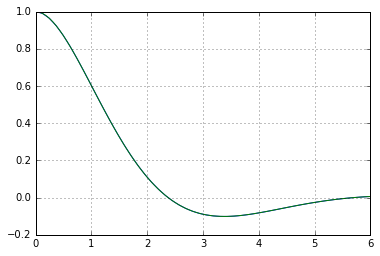

In [39]:
def G(a):
    g=(1/16)*exp(-2*a)*(a+1)+exp(-2*a/3)*(15/16*cos(sqrt(8/9)*a)+33/(sqrt(8)*16)*sin(sqrt(8/9)*a))
    return g                    

aa=np.linspace(0,6,50)
gg=[G(i) for i in aa]

%matplotlib inline
plt.plot(aa,gg,A,B)
plt.grid(True)
plt.show()

Разность решений: G(x)-F

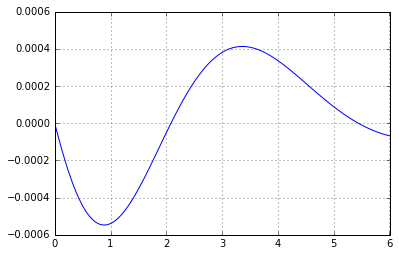

In [50]:
zn=np.array([G(i) for i in A])
sn=np.array(B-zn)


plt.plot(A,sn)
plt.grid(True)
plt.show()

График производной

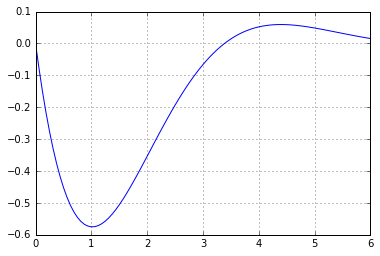

In [41]:
plt.plot(A,C)
plt.grid(True)
plt.show()

Фазовая плоскость: $(y,y')$

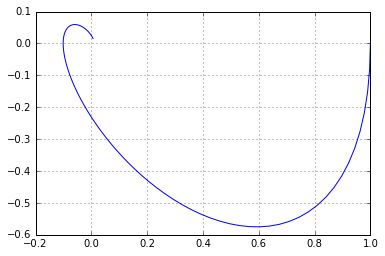

In [42]:
plt.plot(B,C)
plt.grid(True)
plt.show()

### Задание 3: решение ДУ методом Тейлора 2 порядка в режиме "черного ящика"

In [51]:
def f(x,y1,y2):
    f1=y2
    f2=-(4/3)*y1-(4/3)*y2+(x/6)*exp(-2*x)
    return f1,f2

x=Symbol('x')
y1=Symbol('y1')
y2=Symbol('y2')

In [52]:
#x00-начальная точка
#y0-значение функции y в нуле=y1(0)
#y00-значение производной в нуле=y2(0)
#h-шаг
def F(f,x00,y0,y00,h):
    n=0
    z1=np.zeros([2,1])
    #y'=f
    W=np.zeros([2,1])
    #матрица f_x
    while True:
        x0=x00
        y10=np.array([[y0],[y00]])
        #y0 и y00
        n=n+1
        X=[x0]
        Y1=[y0]
        #решение y1=y
        Y2=[y00]
        #решение y2=y'
        k=1
        S=[y0]
        #выборка узлов для сравнения
        
        while x0>=0 and x0<=(6-h):
            m11=diff(f(x,y1,y2)[0],y1).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            m12=diff(f(x,y1,y2)[0],y2).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            m21=diff(f(x,y1,y2)[1],y1).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            m22=diff(f(x,y1,y2)[1],y2).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            M=np.array([[m11,m12],[m21,m22]])
            #якобиан
            
            W[0][0]=diff(f(x,y1,y2)[0],x).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            W[1][0]=diff(f(x,y1,y2)[1],x).evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            
            
            for i in range(2):
                z1[i]=f(x,y1,y2)[i].evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
                #вектор y'
            z2=W+dot(M,z1)
            #y''
            
            yn=y10+h*z1+0.5*z2*h**2
            #итерационный процесс
            
            y10=yn
            x0=x0+h
            X.append(x0)
            Y1.append(yn[0][0])
            Y2.append(yn[1][0])
            
            #выборка
            k=k+1
            if k%2!=0:
                S.append(yn[0][0])
              
        
        h=h*0.5
        S=np.array(S,dtype=np.double)
        
        #выход из цикла
        if n!=1:
            Y3=np.array(Y3,dtype=np.double)
            if norm(S-Y3)/norm(Y3)<0.01:
                break 
        
        Y3=Y1
        
    return X,Y1,Y2


A2=F(f,0,1,0,1)[0]
B2=F(f,0,1,0,1)[1]
C2=F(f,0,1,0,1)[2]

Сравним найденное решение с точным

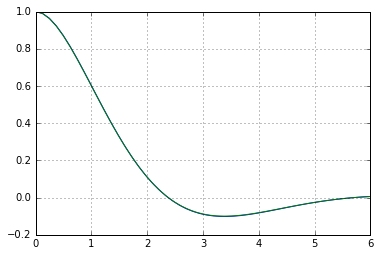

In [53]:
def G(a):
    g=(1/16)*exp(-2*a)*(a+1)+exp(-2*a/3)*(15/16*cos(sqrt(8/9)*a)+33/(sqrt(8)*16)*sin(sqrt(8/9)*a))
    return g                    

aa=np.linspace(0,6,50)
gg=[G(i) for i in aa]

plt.plot(aa,gg,A2,B2)
plt.grid(True)
plt.show()

Разность решений

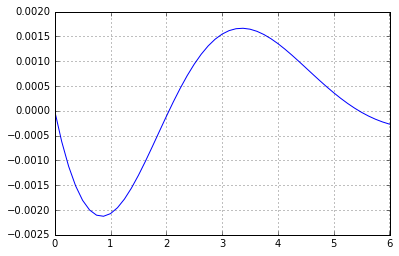

In [55]:
zn1=np.array([G(i) for i in A2])
sn1=np.array(B2-zn1)


plt.plot(A2,sn1)
plt.grid(True)
plt.show()

### Задание 4: решение ДУ методом Рунге-Кутты кратности 4

Итерационный процесс данного метода имеет следующий вид в векторной форме:  
$y_{n+1}=y_n + \frac{h}{6} \cdot (k_1+2k_2+2k_3+k_4)$, где $k_1-k_4$ - векторы, которые определяются следующим образом:  
  
$ k_1 = \begin{array}{c}\ 
f_1(x_n,y^1_n,y^2_n) & \\
f_2(x_n,y^1_n,y^2_n) & 
\end{array} $ 
  
$ k_2 = \begin{array}{c}\ 
f_1(x_n + \frac{h}{2},y^1_n + \frac{h}{2}\cdot(k_1)_{11},y^2_n + \frac{h}{2}\cdot(k_1)_{11}) & \\
f_2(x_n + \frac{h}{2},y^1_n + \frac{h}{2}\cdot(k_1)_{21},y^2_n + \frac{h}{2}\cdot(k_1)_{21}) & 
\end{array} $  
  

$ k_3 = \begin{array}{c}\ 
f_1(x_n + \frac{h}{2},y^1_n + \frac{h}{2}\cdot(k_2)_{11},y^2_n + \frac{h}{2}\cdot(k_2)_{11}) & \\
f_2(x_n + \frac{h}{2},y^1_n + \frac{h}{2}\cdot(k_2)_{21},y^2_n + \frac{h}{2}\cdot(k_2)_{21}) & 
\end{array} $  
  

$ k_4 = \begin{array}{c}\ 
f_1(x_n + h,y^1_n + h\cdot(k_3)_{11},y^2_n + h\cdot(k_3)_{11}) & \\
f_2(x_n + h,y^1_n + h\cdot(k_3)_{21},y^2_n + h\cdot(k_3)_{21}) & 
\end{array} $   
  


Реализуем метод на основе "черного ящика" из предыдущего задания

In [56]:
def R(f,x00,y0,y00,h):
    n=0
    k1=np.zeros([2,1])
    k2=np.zeros([2,1])
    k3=np.zeros([2,1])
    k4=np.zeros([2,1])

    while True:
        x0=x00
        y10=np.array([[y0],[y00]])
        #y и y'
        n=n+1
        X=[x0]
        Y1=[y0]
        Y2=[y00]
        i=1
        S=[y0]
        
        while x0>=0 and x0<=(6-h):
            k1[0][0]=f(x,y1,y2)[0].evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            k1[1][0]=f(x,y1,y2)[1].evalf(subs={x:x0,y1:y10[0][0],y2:y10[1][0]})
            
            k2[0][0]=f(x,y1,y2)[0].evalf(subs={x:x0+0.5*h,y1:y10[0][0]+0.5*h*k1[0][0],y2:y10[1][0]+0.5*h*k1[0][0]})
            k2[1][0]=f(x,y1,y2)[1].evalf(subs={x:x0+0.5*h,y1:y10[0][0]+0.5*h*k1[1][0],y2:y10[1][0]+0.5*h*k1[1][0]})
            
            k3[0][0]=f(x,y1,y2)[0].evalf(subs={x:x0+0.5*h,y1:y10[0][0]+0.5*h*k2[0][0],y2:y10[1][0]+0.5*h*k2[0][0]})
            k3[1][0]=f(x,y1,y2)[1].evalf(subs={x:x0+0.5*h,y1:y10[0][0]+0.5*h*k2[1][0],y2:y10[1][0]+0.5*h*k2[1][0]})
            
            k4[0][0]=f(x,y1,y2)[0].evalf(subs={x:x0+h,y1:y10[0][0]+h*k3[0][0],y2:y10[1][0]+h*k3[0][0]})
            k4[1][0]=f(x,y1,y2)[1].evalf(subs={x:x0+h,y1:y10[0][0]+h*k3[1][0],y2:y10[1][0]+h*k3[1][0]})
           
            yn=y10+(h/6)*(k1+2*k2+2*k3+k4)
            
            
            y10=yn
            x0=x0+h
            X.append(x0)
            
            Y1.append(yn[0][0])
            Y2.append(yn[1][0])
            
            i=i+1
            if i%2!=0:
                S.append(yn[0][0])
               
        h=h*0.5
        S=np.array(S,dtype=np.double)
        
        if n!=1:
            Y3=np.array(Y3,dtype=np.double)
            
            if abs(max(S-Y3))<0.01:
                break 
            
        Y3=Y1
     
    return X,Y1,Y2

A1=R(f,0,1,0,1)[0]
B1=R(f,0,1,0,1)[1]
#C1=R(f,0,1,0,1)[2]



График решения методом и точное решение

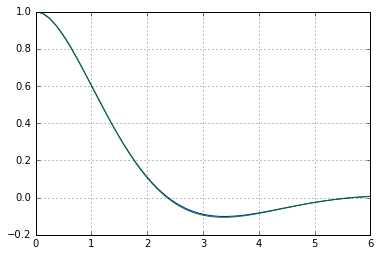

In [57]:
def G(a):
    g=(1/16)*exp(-2*a)*(a+1)+exp(-2*a/3)*(15/16*cos(sqrt(8/9)*a)+33/(sqrt(8)*16)*sin(sqrt(8/9)*a))
    return g                    

aa=np.linspace(0,6,50)
gg=[G(i) for i in aa]


plt.plot(aa,gg,A1,B1)
plt.grid(True)
plt.show()

Сравнение решений (вывод разницы)

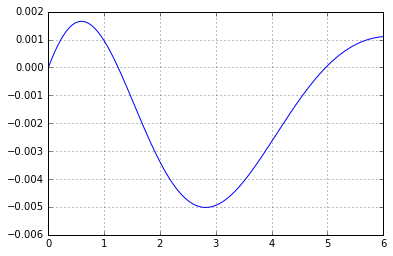

In [59]:
zn2=np.array([G(i) for i in A1])

s2n=np.array(B1-zn2)


plt.plot(A1,s2n)
plt.grid(True)
plt.show()


Метод Тейлора и Рунге-Кутты

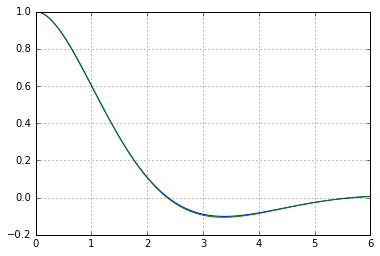

In [60]:
plt.plot(A,B,A1,B1)
plt.grid(True)
plt.show()

Выполнила: Тюрина Анастасия, 431 группа